In [1]:
from astropy.io import fits
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
hdul = fits.open("../EN1/HSCJ_EN1_u2k_CATALOG_beta0pt9.fits")
FLAGS = fits.open("../EN1/HSCJ_EN1_u2k_FLAGS_beta0pt9.fits")

#this one is big and annoying to load...
zout = np.genfromtxt("../EN1/HSCJ_EN1_u2irac_v3.3.zout",dtype=str)


In [3]:
data = hdul[1].data

## FLAGS

In [4]:
galaxy_flag = FLAGS[1].data.field("use_hiz")+FLAGS[1].data.field("use_galaxy")
#fairly sure all use_hiz are part of uze_galaxy, but to be sure....

In [5]:
#relevent fluxes

fluxy = data.field("y_psfFlux")
fluxu = data.field("u_psfFlux")
fluxg = data.field("g_psfFlux")
fluxr = data.field("r_psfFlux")

#relevant z_photo info

z_spec = np.array(zout[:,2],dtype=float)
z_spec_flag = zout[:,3]

nfilt = np.array(zout[:,4],dtype=int)

z_phot = np.array(zout[:,5],dtype=float) #11 (Median) is better? 7 is best fit or spec-z if available
z_phot_chi2 = np.array(zout[:,6],dtype=float)

#

In [6]:
# y_cut

In [7]:
# y_cut
in_AB = (-2.5*log10(fluxy) + 27) < 25.3

#ugr cut
ugr = (fluxu>0)*(fluxg>0)*(fluxr>0)


#z_cut
z_cut = (z_phot>2.1)*(z_phot<3.5)

z_background = (z_phot>2.5)
#filters cut
filter_cut = (nfilt>10)

#r_cut
r_AB = (-2.5*log10(fluxr) + 27)

r_low = (r_AB>24.2)

r_high = (r_AB<24.8)



/global/homes/b/bhorowit/.conda/envs/nersc-all2/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/global/homes/b/bhorowit/.conda/envs/nersc-all2/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/global/homes/b/bhorowit/.conda/envs/nersc-all2/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


In [8]:
#Foreground sample:

bool_foreground = galaxy_flag*z_cut*ugr*in_AB*filter_cut*~z_background
np.sum(bool_foreground)

41373

In [9]:
#high
bool_high = galaxy_flag*z_cut*ugr*in_AB*filter_cut*z_background*r_low*r_high
np.sum(bool_high)

4403

In [10]:
#low
bool_low = galaxy_flag*z_cut*ugr*in_AB*filter_cut*z_background*(~r_low)
np.sum(bool_low)

1339

In [11]:
#show on sky...
RA = data.field("RA")
DEC = data.field("DEC")

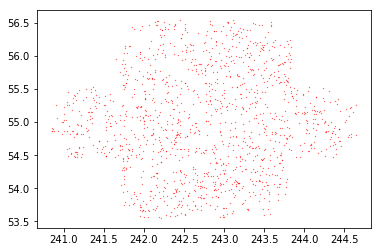

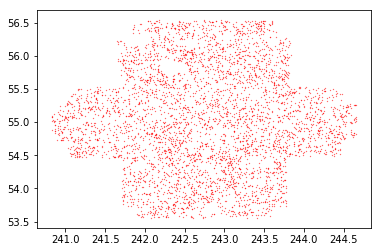

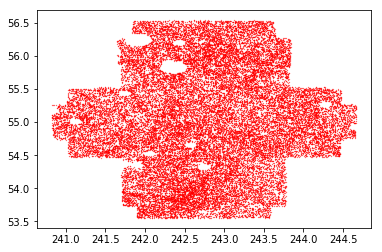

In [12]:
plt.plot(RA[bool_low],DEC[bool_low],"r.",markersize=0.5)
show()
plt.plot(RA[bool_high],DEC[bool_high],"r.",markersize=0.5)
show()
plt.plot(RA[bool_foreground],DEC[bool_foreground],"r.",markersize=0.5)
show()